<a href="https://colab.research.google.com/github/jhoselin48/SSF-Oto25JhoselinMarisolConstantinoEstrada/blob/main/SSF_Constantino_Integraci%C3%B3n215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# FUNCIÓN
fx = lambda x: (np.e**((-x**2)/2))/(np.sqrt(2*np.pi))
a = -1  # intervalo de integración
b = 1

In [120]:
# FUNCIÓN 2
fx = lambda x: (np.e**(-x)*np.sin(x))/(1+x**2)
a = 0  # intervalo de integración
b = 3

In [115]:
tramos = 6

In [121]:
tramos=15

tramos:  15
Integral fx con trapecio:  0.2618032972508303


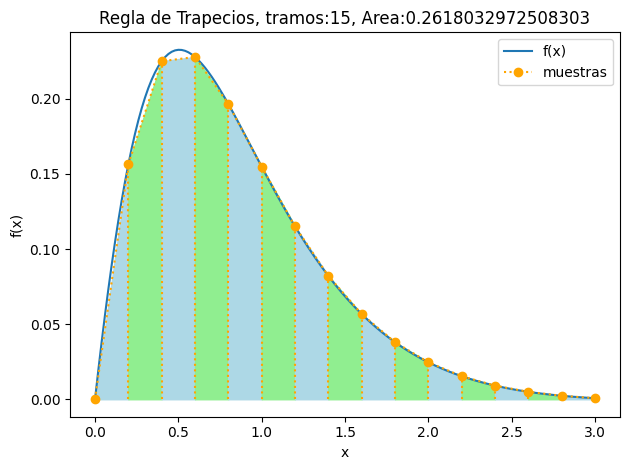

Global maximum error (Trapezoidal Rule): 0.011218657466802895


In [122]:
#Recuperado de https://blog.espol.edu.ec/analisisnumerico/regla-del-trapecio/
# Regla de los trapecios: f(x) entre [a,b],tramos
import numpy as np
import matplotlib.pyplot as plt

# PROCEDIMIENTO
muestras = tramos + 1

# Regla del Trapecio
h = (b-a)/tramos # tramos equidistantes
xi_integral = a
sumatrap = 0
i = 0
while (i+1)<muestras:
    trapecio = (h/2)*(fx(xi_integral)+fx(xi_integral+h))
    sumatrap = sumatrap + trapecio
    xi_integral = xi_integral + h
    i = i+1

# SALIDA
print('tramos: ', tramos)
print('Integral fx con trapecio: ', sumatrap)

# Función original
muestrasfxSuave = tramos*10 + 1
xk = np.linspace(a,b,muestrasfxSuave)
fk = fx(xk)

# Función usando el método del trapecio
xi = np.linspace(a,b,muestras)
fi = fx(xi)

# GRÁFICA
plt.plot(xk,fk, label ='f(x)')
plt.plot(xi,fi, marker='o',linestyle='dotted',
         color='orange', label ='muestras')

plt.xlabel('x')
plt.ylabel('f(x)')
titulo = 'Regla de Trapecios'
titulo = titulo + ', tramos:'+str(tramos)
titulo = titulo + ', Area:'+str(sumatrap)
plt.title(titulo)
plt.legend()
plt.tight_layout()

# Trapecios relleno
errores_segmento = []
for i in range(0,muestras-1,1):
    x_tramo = xi[i:(i+1)+1]
    f_tramo = fi[i:(i+1)+1]

#ERROR
    # Cálculo del error por segmento
    x_segmento_dense = np.linspace(x_tramo[0], x_tramo[1], 20) # More points within segment
    fx_actual = fx(x_segmento_dense)
    # Linear approximation for the trapezoid segment
    m = (f_tramo[1] - f_tramo[0]) / (x_tramo[1] - x_tramo[0])
    fx_trapezoid = f_tramo[0] + m * (x_segmento_dense - x_tramo[0])
    error_segmento = abs(fx_actual - fx_trapezoid)
    errores_segmento.append(error_segmento)


    relleno = 'lightgreen'
    if (i%2)==0: # i multiplo 2, o par
        relleno ='lightblue'
    plt.fill_between(x_tramo,f_tramo,f_tramo*0,
                     color=relleno)
    plt.vlines(xi[i],0,fi[i],linestyle='dotted',
               color='orange')

plt.show()

# Print overall maximum error
global_max_error = np.max(errores_segmento)
print(f"Global maximum error (Trapezoidal Rule): {global_max_error}")

tramos: 15
Integral fx con Simpson 3/8:  0.26525713003333884


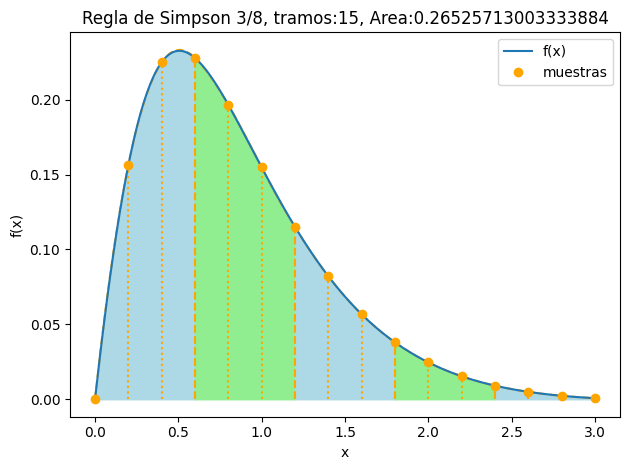

Global maximum error (Simpson 3/8 Rule): 0.0012040031749582653


In [123]:
#Recuperado de https://blog.espol.edu.ec/analisisnumerico/regla-de-simpson-3-8/
# Regla Simpson 3/8 para f(x) entre [a,b],tramos


# validar: tramos debe ser múltiplo de 3
if tramos % 3 != 0:
    print(f"Warning: tramos ({tramos}) is not a multiple of 3. Using tramos = 6 for Simpson 3/8 rule.")

# PROCEDIMIENTO
muestras = tramos + 1
# Regla de Simpson 3/8
h = (b-a)/tramos
current_xi = a  # Renamed xi to current_xi to avoid conflict
sumasimp = 0 # integral numérico
for i in range(0,tramos-2,3): #muestras-3
    S38 = (3/8)*h*(fx(current_xi)+3*fx(current_xi+h)+3*fx(current_xi+2*h)+fx(current_xi+3*h))
    sumasimp = sumasimp + S38
    current_xi = current_xi + 3*h # avanza 3 tramos

# SALIDA
print('tramos:', tramos)
print('Integral fx con Simpson 3/8: ', sumasimp)

# points for plotting
muestras = tramos + 1
xi = np.linspace(a,b,muestras)
fi = fx(xi)

# fx suave aumentando muestras
muestrasfxSuave = tramos*20 + 1
xk = np.linspace(a,b,muestrasfxSuave)
fk = fx(xk)

# Simpson 3/8 relleno y bordes, cada 3 tramos
errores_segmento_simpson = []
for i in range(0,muestras-1,3): # iterate over blocks of 3 segments
    x_tramo = xi[i:(i+3)+1]
    f_tramo = fi[i:(i+3)+1]

    # interpolación polinomica a*(x**3)+b*(x**2)+c*x+d
    coef = np.polyfit(x_tramo, f_tramo, 3) # [a,b,c,d]
    px = lambda x: coef[0]*(x**3)+coef[1]*(x**2)+coef[2]*x+coef[3]

    # Calculate error within the block of 3 segments
    x_segmento_dense = np.linspace(x_tramo[0], x_tramo[-1], 50) # More points within the block
    fx_actual = fx(x_segmento_dense)
    fx_simpson_approx = px(x_segmento_dense)
    error_segmento = abs(fx_actual - fx_simpson_approx)
    errores_segmento_simpson.append(error_segmento)


    xp = np.linspace(x_tramo[0],x_tramo[-1],21)
    fp = px(xp)
    plt.plot(xp,fp,linestyle='dashed',color='orange')

    relleno = 'lightgreen'
    if (i/3)%2==0: # bloque 3 tramos, es par
        relleno ='lightblue'
    plt.fill_between(xp,fp,fp*0,color=relleno)

# Divisiones entre Simpson 3/8
for i in range(0,muestras,1):
    tipolinea = 'dotted'
    if i%3==0: # i es multiplo de 3
        tipolinea = 'dashed'
    plt.vlines(xi[i],0,fi[i],
               linestyle=tipolinea,
               color='orange')

# Graficar f(x), puntos
plt.plot(xk,fk,label='f(x)')
plt.plot(xi,fi,'o',color='orange',label ='muestras')

plt.xlabel('x')
plt.ylabel('f(x)')
titulo = 'Regla de Simpson 3/8'
titulo = titulo + ', tramos:'+str(tramos)
titulo = titulo + ', Area:'+str(sumasimp)
plt.title(titulo)
plt.legend()
plt.tight_layout()
plt.show()

# Print overall maximum error for Simpson 3/8
global_max_error_simpson = np.max(errores_segmento_simpson)
print(f"Global maximum error (Simpson 3/8 Rule): {global_max_error_simpson}")

Integral Cuadratura Gauss:  0.26516428009588466


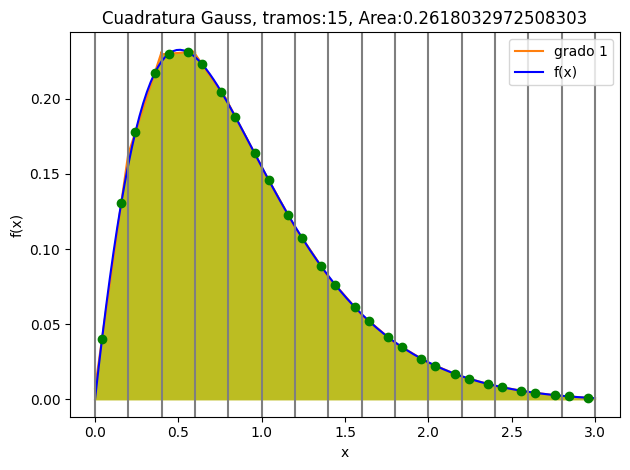

Global maximum error (approximation for plotting): 0.007616981695359154


In [124]:
#Recuperado de https://blog.espol.edu.ec/analisisnumerico/cuadratura-de-gauss/
# Integración: Cuadratura de Gauss de dos puntos
# modelo con varios tramos entre [a,b]

# cuadratura de Gauss de dos puntos
def integraCuadGauss2p(fx,a,b):
    ''' funcion fx, intervalo[a,b]
    '''
    x0 = -1/np.sqrt(3)
    x1 = -x0
    xa = (b+a)/2 + (b-a)/2*(x0)
    xb = (b+a)/2 + (b-a)/2*(x1)
    area = ((b-a)/2)*(fx(xa) + fx(xb))
    return(area)

# PROCEDIMIENTO
muestras = tramos+1
xi = np.linspace(a,b,muestras) # Use xi for segment points
area = 0
for i in range(0,muestras-1,1):
    deltaA = integraCuadGauss2p(fx,xi[i],xi[i+1]) # Removed vertabla as it's not used
    area = area + deltaA
# SALIDA
print('Integral Cuadratura Gauss: ', area)

# GRAFICAR por cada Segmento/tramo
# para concepto con 'pocos' segmentos
subtramo = xi
muestrastramo = 10
x0 = -1/np.sqrt(3)
x1 = 1/np.sqrt(3)

# gráficas de todos los tramos
xj = [] ; fj = []
recta = []
global_max_error_gauss_plot = 0 # Initialize global maximum error for plotting approximation

for i in range(0,tramos,1):
    ai = subtramo[i]
    bi = subtramo[i+1]

    xk_segment = np.linspace(ai,bi,muestrastramo)
    fk_segment = fx(xk_segment)

    xj = xj + list(xk_segment)
    fj = fj + list(fk_segment)

    # puntos xa y xb por tramo
    xa = (bi+ai)/2 + (bi-ai)/2*(x0)
    xb = (bi+ai)/2 + (bi-ai)/2*(x1)

    # Recta entre puntos xa y xb por tramo
    m = (fx(xb)-fx(xa))/(xb-xa)
    b0 = fx(xa) - m*xa
    linea_segment = b0 + m*xk_segment
    recta = recta + list(linea_segment)

    # Calculate error between fx and the linear approximation within the segment
    error_segment_plot = abs(fk_segment - linea_segment)
    max_error_segment_plot = np.max(error_segment_plot)
    if max_error_segment_plot > global_max_error_gauss_plot:
        global_max_error_gauss_plot = max_error_segment_plot


# Marcadores 'o' de xa y xb por tramos (using the points calculated in the loop)
# Need to collect xa and xb from the loop
xa_points = [(xi[i]+xi[i+1])/2 + (xi[i+1]-xi[i])/2*(x0) for i in range(tramos)]
xb_points = [(xi[i]+xi[i+1])/2 + (xi[i+1]-xi[i])/2*(x1) for i in range(tramos)]
puntox = np.array(xa_points + xb_points)
puntoy = fx(puntox)


# Trazado de lineas
plt.plot(xj,recta, label = 'grado 1', color = 'tab:orange')
plt.fill_between(xj,0,recta, color='tab:olive')
plt.plot(xj,fj, label='f(x)', color = 'blue')

# Verticales para dividir los tramos
for i in range(0,len(subtramo),1):
    plt.axvline(subtramo[i], color='tab:gray')

# Marcadores de puntos xa y xb por tramos
plt.plot(puntox,puntoy, 'o', color='g')

plt.xlabel('x')
plt.ylabel('f(x)')
titulo = 'Cuadratura Gauss'
titulo = titulo + ', tramos:'+str(tramos)
titulo = titulo + ', Area:'+str(sumatrap)
plt.title(titulo)
plt.legend()
plt.tight_layout()


plt.show()

# Print the calculated global maximum error for the plotting approximation
print(f"Global maximum error (approximation for plotting): {global_max_error_gauss_plot}")

In [125]:
from tabulate import tabulate
print('Función 1, Tramos ', tramos)
data = [
    ['Integración', sumatrap, sumasimp, area],
    ['Error', global_max_error, global_max_error_simpson, global_max_error_gauss_plot]
]
headers=['', 'Trapecio', 'Simpson 3/8', 'Cuadratura Gauss']
table=tabulate(data, headers, tablefmt="fancy_grid")
print(table)

Función 1, Tramos  15
╒═════════════╤════════════╤═══════════════╤════════════════════╕
│             │   Trapecio │   Simpson 3/8 │   Cuadratura Gauss │
╞═════════════╪════════════╪═══════════════╪════════════════════╡
│ Integración │  0.261803  │      0.265257 │         0.265164   │
├─────────────┼────────────┼───────────────┼────────────────────┤
│ Error       │  0.0112187 │      0.001204 │         0.00761698 │
╘═════════════╧════════════╧═══════════════╧════════════════════╛
